In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [209]:
import pandas as pd

problem = pd.read_csv('Problem.csv')
problem

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
1,F,0.625,0.485,0.160,1.2540,0.5910,0.2590,0.3485,9
2,I,0.500,0.375,0.140,0.5590,0.2375,0.1350,0.1690,9
3,M,0.715,0.520,0.180,1.6000,0.7080,0.3525,0.4450,12
4,M,0.630,0.510,0.175,1.3415,0.6575,0.2620,0.3750,10
...,...,...,...,...,...,...,...,...,...
3127,I,0.580,0.445,0.150,0.8865,0.3830,0.2090,0.2550,11
3128,F,0.490,0.390,0.135,0.5900,0.2150,0.1250,0.1845,12
3129,I,0.425,0.325,0.105,0.3975,0.1815,0.0810,0.1175,7
3130,F,0.595,0.440,0.135,0.9640,0.5005,0.1715,0.2575,10


In [210]:
abalone = pd.read_csv('mix_abalone_train.csv')
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
94787,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
94788,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
94789,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
94790,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [211]:
# 합치기
df = pd.concat([problem, abalone], ignore_index=True)

# 완전히 같은 행 제거
df = df.drop_duplicates()
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
1,F,0.625,0.485,0.160,1.2540,0.5910,0.2590,0.3485,9
2,I,0.500,0.375,0.140,0.5590,0.2375,0.1350,0.1690,9
3,M,0.715,0.520,0.180,1.6000,0.7080,0.3525,0.4450,12
4,M,0.630,0.510,0.175,1.3415,0.6575,0.2620,0.3750,10
...,...,...,...,...,...,...,...,...,...
97909,M,0.385,0.255,0.100,0.3175,0.1370,0.0680,0.0920,8
97910,I,0.390,0.310,0.085,0.3440,0.1810,0.0695,0.0790,7
97911,I,0.390,0.290,0.100,0.2845,0.1255,0.0635,0.0810,7
97915,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8


In [212]:
df = df[df['Height']>0]

In [213]:
df = df[df['Whole_weight'] >= df['Shucked_weight'] + df['Shell_weight']]

In [214]:
#일단 성별만 0/1로 바꾸기
from sklearn.preprocessing import OneHotEncoder
df =df.reset_index()
oh = OneHotEncoder()
encoded = oh.fit_transform(df[['Sex']])  # DataFrame 형태로 전달
encoded_df = pd.DataFrame(encoded.toarray(), columns=oh.get_feature_names_out())
encoded_df
df = pd.concat([df,encoded_df],axis = 1)
df

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0.0,1.0,0.0
1,1,F,0.625,0.485,0.160,1.2540,0.5910,0.2590,0.3485,9,1.0,0.0,0.0
2,2,I,0.500,0.375,0.140,0.5590,0.2375,0.1350,0.1690,9,0.0,1.0,0.0
3,3,M,0.715,0.520,0.180,1.6000,0.7080,0.3525,0.4450,12,0.0,0.0,1.0
4,4,M,0.630,0.510,0.175,1.3415,0.6575,0.2620,0.3750,10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94470,97909,M,0.385,0.255,0.100,0.3175,0.1370,0.0680,0.0920,8,0.0,0.0,1.0
94471,97910,I,0.390,0.310,0.085,0.3440,0.1810,0.0695,0.0790,7,0.0,1.0,0.0
94472,97911,I,0.390,0.290,0.100,0.2845,0.1255,0.0635,0.0810,7,0.0,1.0,0.0
94473,97915,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8,1.0,0.0,0.0


In [215]:
del df['index']
del df['Sex']

In [216]:
df['Len^2'] = df['Length']**2
df['Dia^2'] = df['Diameter']**2
df['Hei^2'] = df['Height']**2
#부피 - 타원
df['Volume'] = (np.pi / 6) * df['Length'] * df['Diameter'] * df['Height']

# 곱
df['Length*Diameter'] = df['Length'] * df['Diameter']
df['Length*Height'] = df['Length'] * df['Height']
df['Diameter*Height'] = df['Diameter'] * df['Height']

# 내부 무게 합계
df['Internal_Weight'] = df['Shucked_weight'] + df['Viscera_weight']

# 내부와 껍질 무게 차이
df['Shell_Weight_Difference'] = df['Whole_weight'] - df['Internal_Weight']

In [172]:
#del df['Whole_weight']
#del df['Shucked_weight']
#del df['Length']
#del df['Height']

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94475 entries, 0 to 94474
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Length                   94475 non-null  float64
 1   Diameter                 94475 non-null  float64
 2   Height                   94475 non-null  float64
 3   Whole_weight             94475 non-null  float64
 4   Shucked_weight           94475 non-null  float64
 5   Viscera_weight           94475 non-null  float64
 6   Shell_weight             94475 non-null  float64
 7   Rings                    94475 non-null  int64  
 8   Sex_F                    94475 non-null  float64
 9   Sex_I                    94475 non-null  float64
 10  Sex_M                    94475 non-null  float64
 11  Len^2                    94475 non-null  float64
 12  Dia^2                    94475 non-null  float64
 13  Hei^2                    94475 non-null  float64
 14  Volume                

In [223]:
from sklearn.model_selection import train_test_split
X = df.drop('Rings', axis = 1)
Y = df['Rings']

train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [193]:
from sklearn.utils import all_estimators
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# scikit-learn의 모든 회귀 모델\
all_regressors = all_estimators(type_filter='regressor')
results_dic = {}

print("모델별 RMSE 평가 결과:")
for name, RegressorClass in all_regressors:
    try:
        # 모델 인스턴스 생성
        model = RegressorClass()
        # 전처리 단계를 제거하고 바로 교차검증 수행
        scores = cross_val_score(model, X, Y, cv=kf, scoring="neg_mean_squared_error")
        rmse = np.sqrt(-scores.mean())
        results_dic[name] = rmse
        print(f"{name:30}: RMSE = {rmse:.3f}")
    except Exception as e:
        print(f"{name:30}: 오류")


reg_result_df = pd.DataFrame(list(results_dic.items()), columns=["Model", "RMSE"]).sort_values(by="RMSE")
reg_result_df

모델별 RMSE 평가 결과:
ARDRegression                 : RMSE = 1.969
AdaBoostRegressor             : RMSE = 3.051
BaggingRegressor              : RMSE = 1.977
BayesianRidge                 : RMSE = 1.969
CCA                           : 오류
DecisionTreeRegressor         : RMSE = 2.666
DummyRegressor                : RMSE = 3.172
ElasticNet                    : RMSE = 2.976
ElasticNetCV                  : RMSE = 2.043
ExtraTreeRegressor            : RMSE = 2.698
ExtraTreesRegressor           : RMSE = 1.898
GammaRegressor                : RMSE = 2.752
GaussianProcessRegressor      : 오류
GradientBoostingRegressor     : RMSE = 1.884
HistGradientBoostingRegressor : RMSE = 1.860
HuberRegressor                : RMSE = 2.009
IsotonicRegression            : 오류
KNeighborsRegressor           : RMSE = 2.029
KernelRidge                   : 오류
Lars                          : RMSE = 3491.666
LarsCV                        : RMSE = 2.247
Lasso                         : RMSE = 3.172
LassoCV                       :

KeyboardInterrupt: 

In [ ]:
#svr/GradientBoosting/ridge - randomForest/ GBR1.884

SVR RMSE: 2.2179
SVR R²: 0.5310
Ridge RMSE: 2.2324
Ridge R²: 0.5249
GBR RMSE: 2.1901
GBR R²: 0.5427


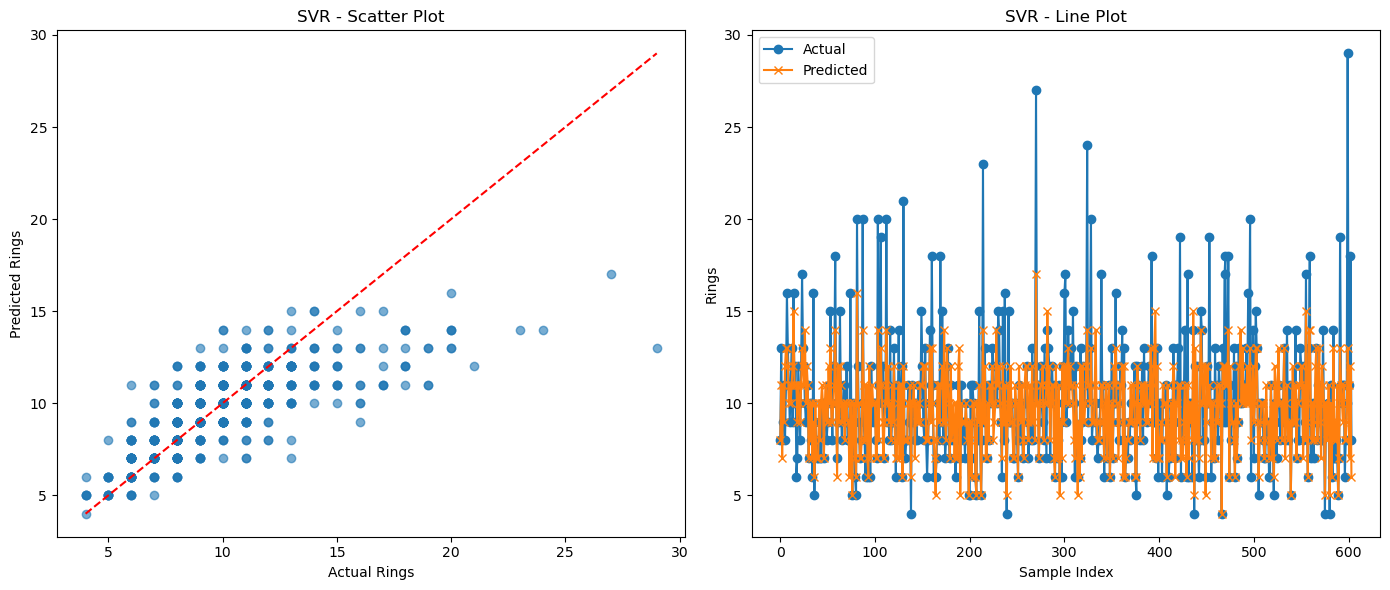

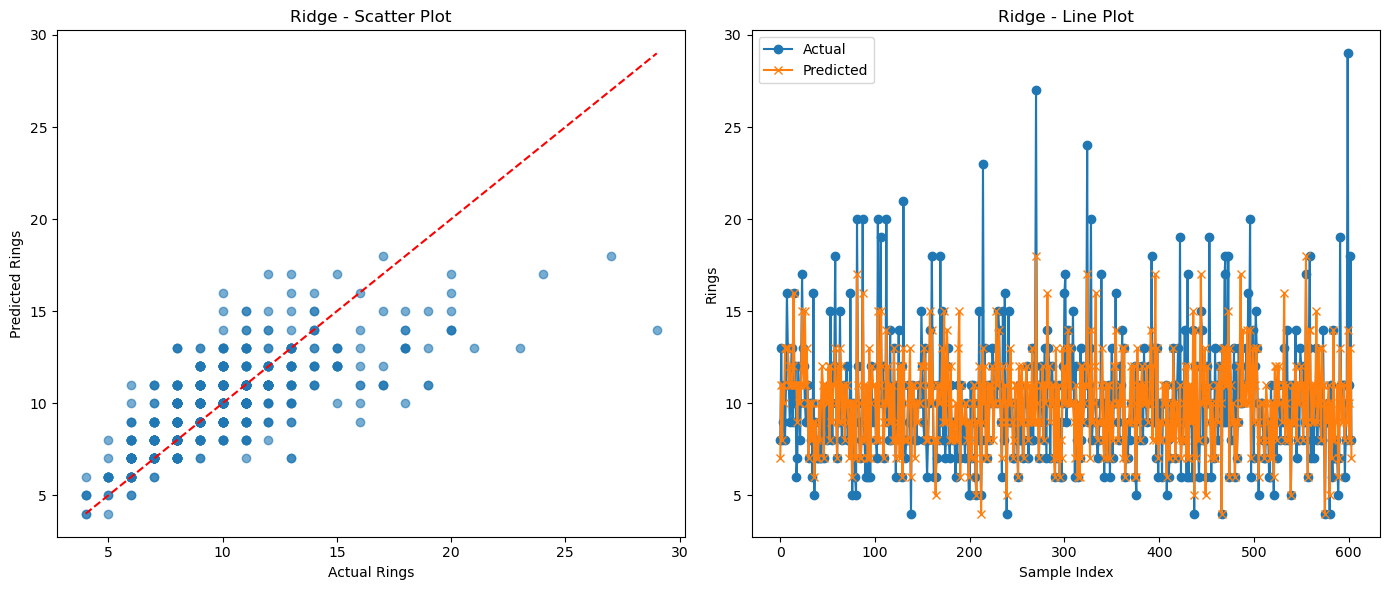

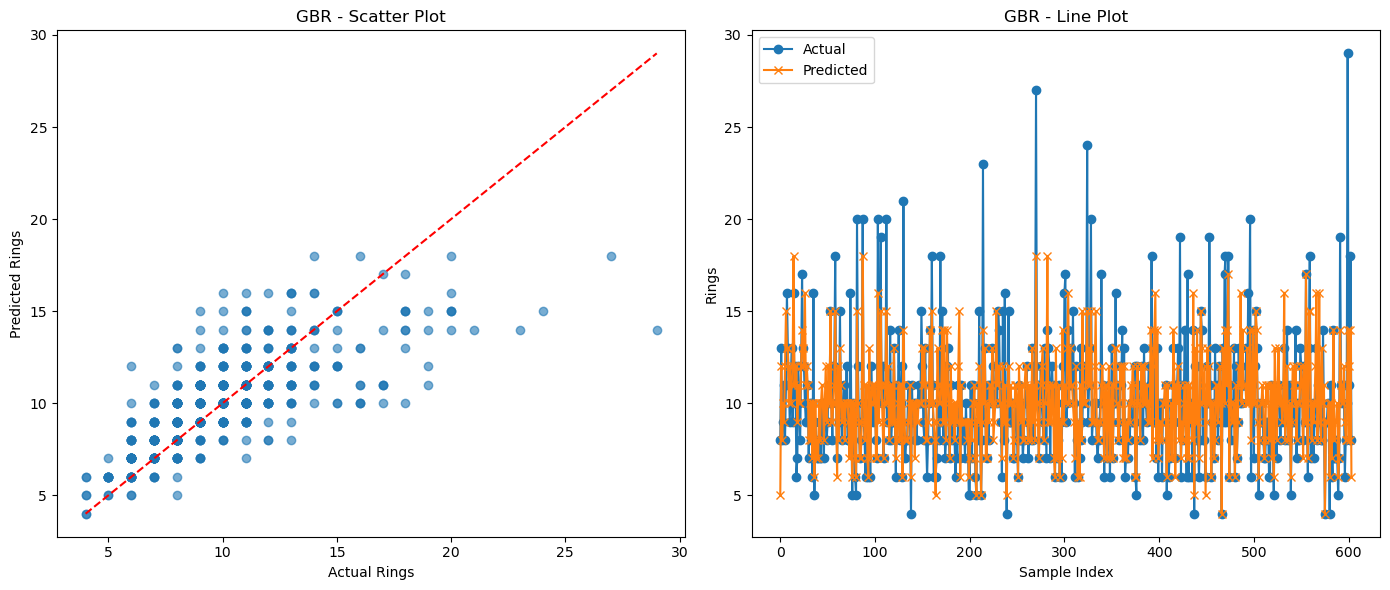

In [141]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# RMSE & R² 평가
def evaluate_model(name, actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    print(f"{name} RMSE: {rmse:.4f}")
    print(f"{name} R²: {r2:.4f}")



# 시각화 (Scatter Plot + Line Plot)
def plot_results(actual, predicted, model_name):
    plt.figure(figsize=(14, 6))

    # Scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(actual, predicted, alpha=0.6)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
    plt.xlabel("Actual Rings")
    plt.ylabel("Predicted Rings")
    plt.title(f"{model_name} - Scatter Plot")

    # Line plot
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(len(actual)), actual.values, label="Actual", marker='o')
    plt.plot(np.arange(len(predicted)), predicted, label="Predicted", marker='x')
    plt.xlabel("Sample Index")
    plt.ylabel("Rings")
    plt.title(f"{model_name} - Line Plot")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [239]:
from sklearn.ensemble import RandomForestRegressor
# 모델 준비
svr_model = SVR()
ridge_model = Ridge()
gbr_model = GradientBoostingRegressor()
rf_model = RandomForestRegressor()

# 학습
svr_model.fit(train_x, train_y)
ridge_model.fit(train_x, train_y)
gbr_model.fit(train_x, train_y)
rf_model.fit(train_x, train_y)

# 예측
svr_pred =np.round(svr_model.predict(test_x)) 
ridge_pred =np.round(ridge_model.predict(test_x)) 
gbr_pred =np.round(gbr_model.predict(test_x))
rf_pred =np.round(rf_model.predict(test_x))

# 실제 타겟값
actual = test_y

evaluate_model("SVR", actual, svr_pred)
evaluate_model("Ridge", actual, ridge_pred)
evaluate_model("GBR", actual, gbr_pred)
evaluate_model("rf", actual, rf_pred)

SVR RMSE: 1.9554
SVR R²: 0.6137
Ridge RMSE: 1.9771
Ridge R²: 0.6051
GBR RMSE: 1.8854
GBR R²: 0.6409
rf RMSE: 1.8876
rf R²: 0.6400


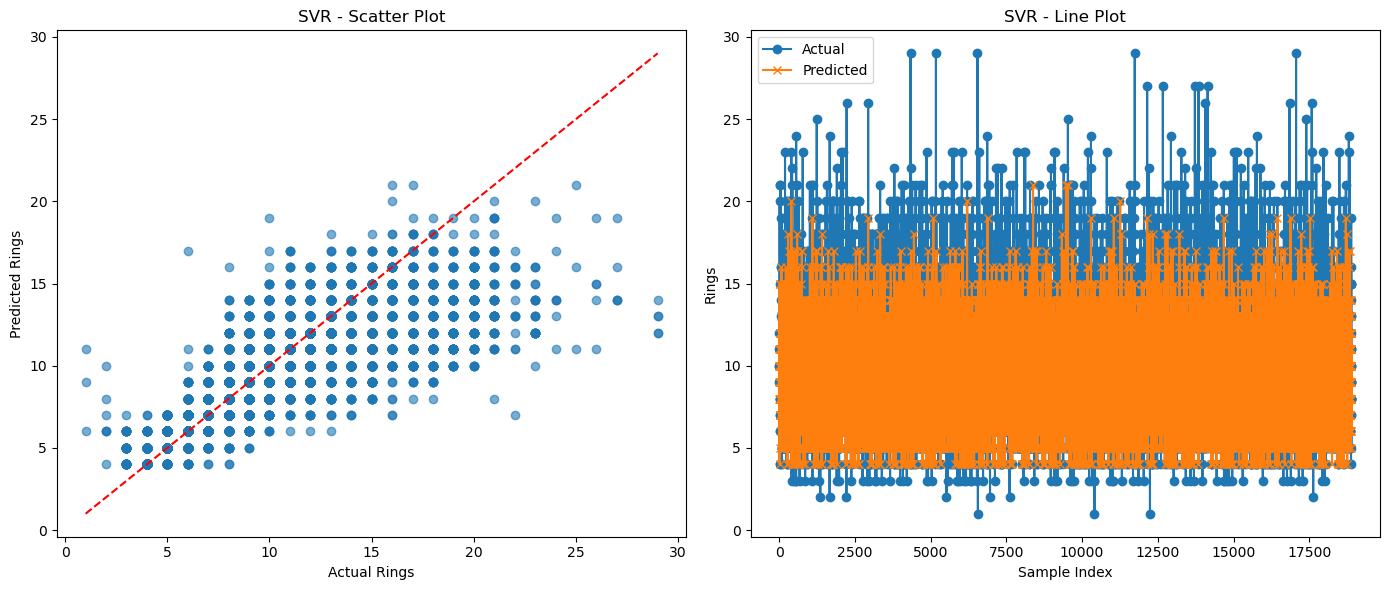

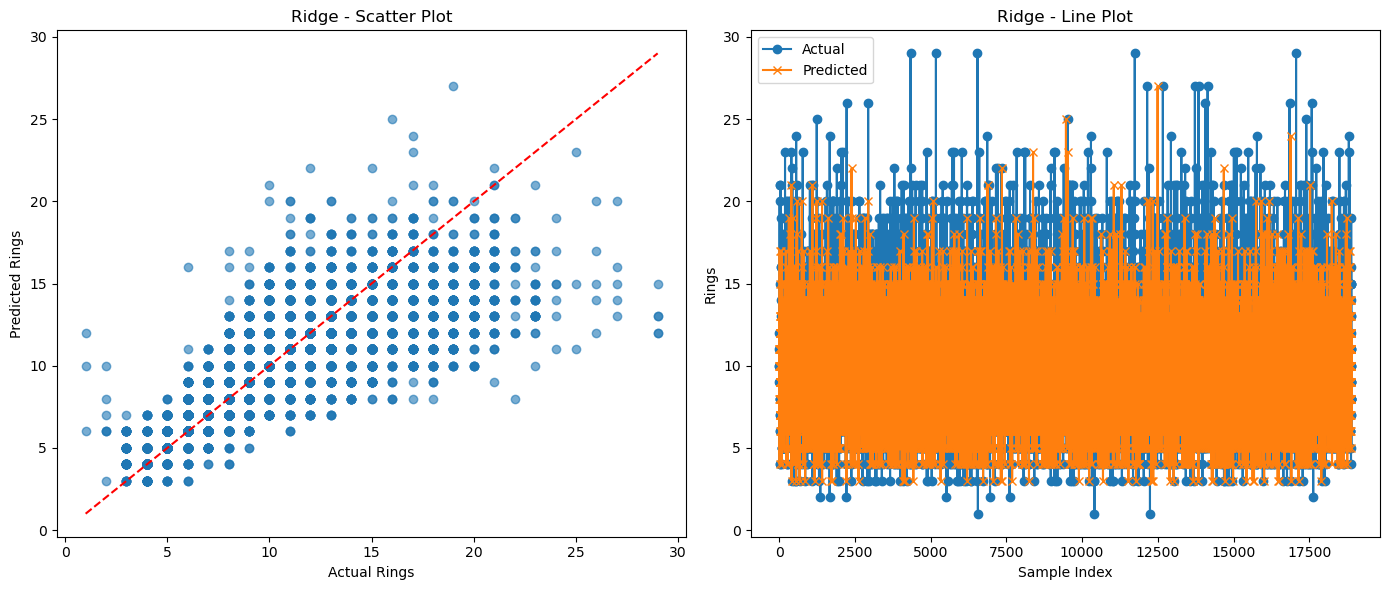

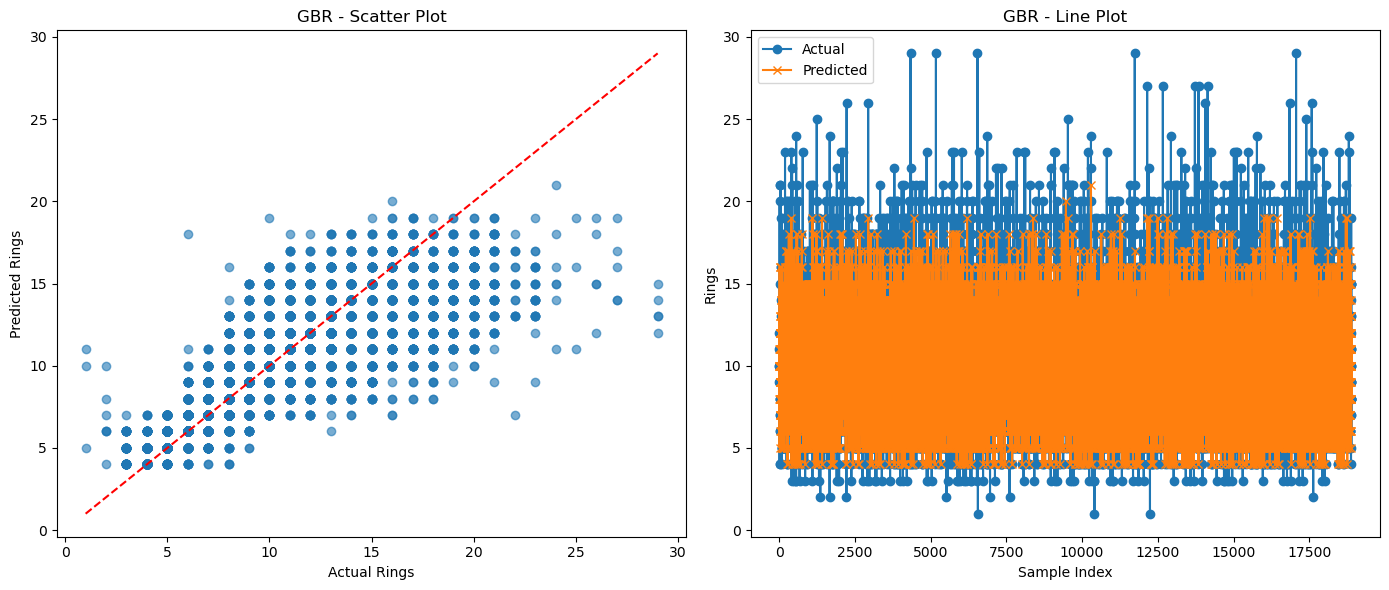

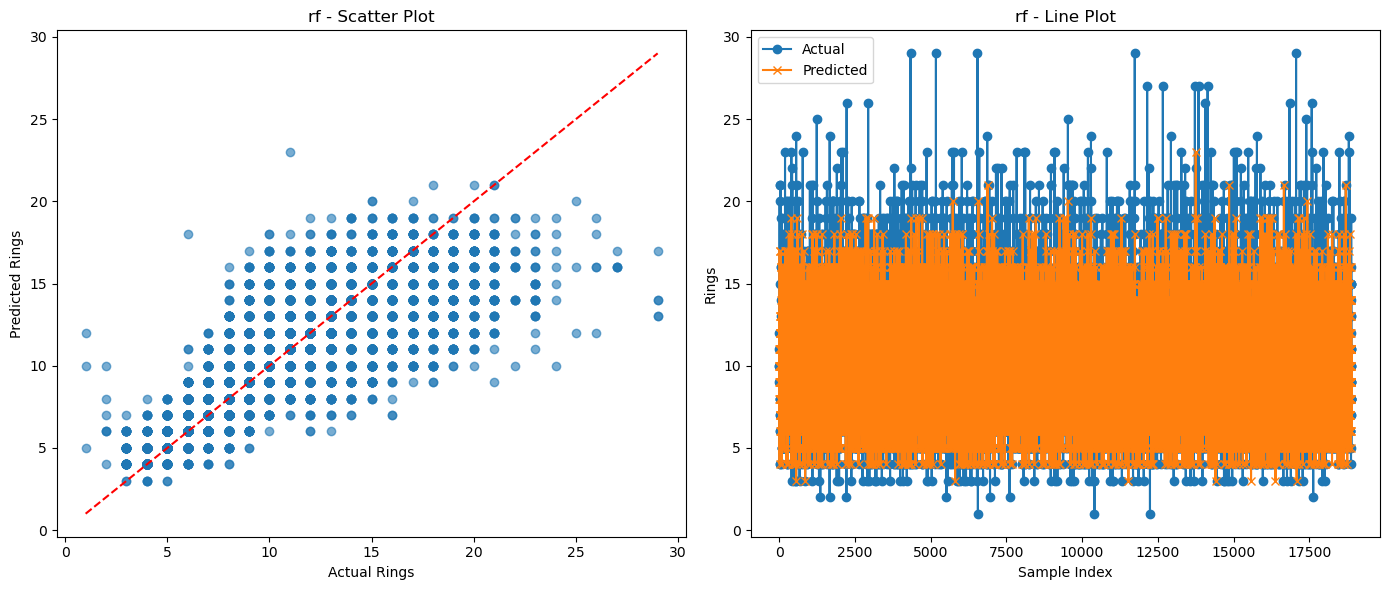

In [240]:
# 시각화 호출
plot_results(actual, svr_pred, "SVR")
plot_results(actual, ridge_pred, "Ridge")
plot_results(actual, gbr_pred, "GBR")
plot_results(actual, rf_pred, "rf")

GBR이 젤 잘나옴 
- Rings가 높은 경우 예측이 잘 안되는 문제 
- 실제 값이 높을수록 예측이 따라가지 못하고 flatten. - 더 복잡한 피처

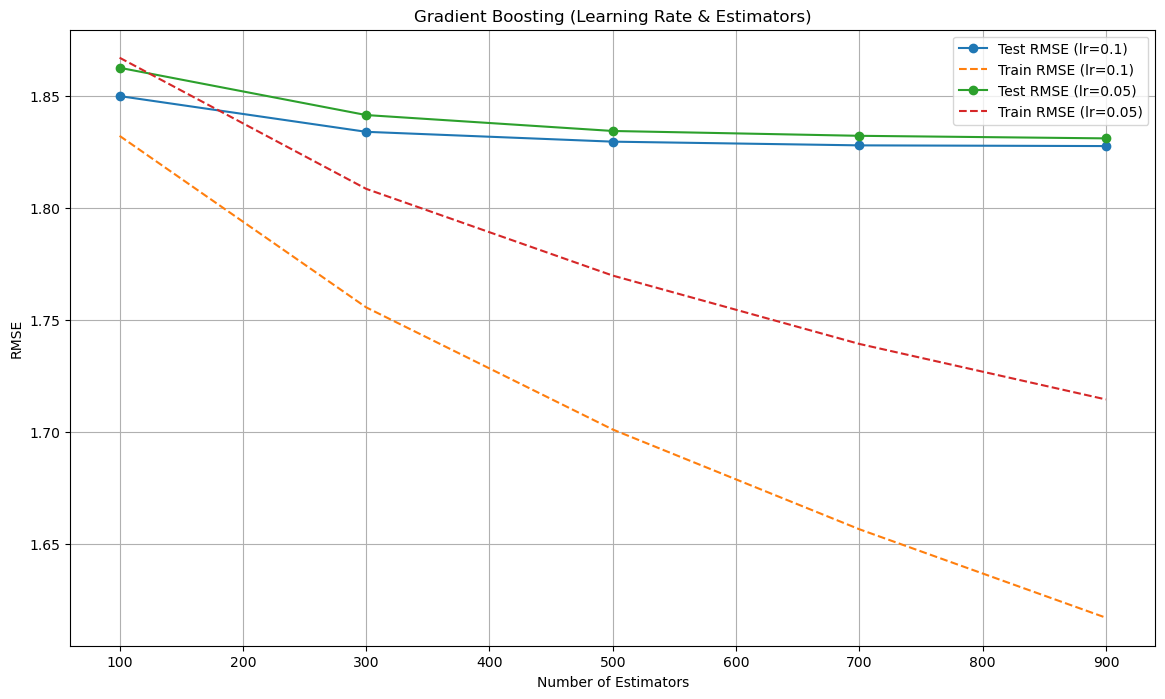

In [243]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

learning_rates = [0.1, 0.05]
n_estimators_range = range(100, 1000, 200)

results = {}

# 각 learning rate 별로 실험
for lr in learning_rates:
    train_errors = []
    test_errors = []
    
    for n in n_estimators_range:
        model = GradientBoostingRegressor(
            learning_rate=lr,
            n_estimators=n,
            max_depth=4,
            random_state=42
        )
        model.fit(train_x, train_y)
        
        # 예측
        train_pred = model.predict(train_x)
        test_pred = model.predict(test_x)
        
        # RMSE
        train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
        test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))
        
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)
    
    results[lr] = {'train': train_errors, 'test': test_errors}

plt.figure(figsize=(14, 8))

for lr in learning_rates:
    plt.plot(n_estimators_range, results[lr]['test'], label=f'Test RMSE (lr={lr})', marker='o')
    plt.plot(n_estimators_range, results[lr]['train'], label=f'Train RMSE (lr={lr})', linestyle='--')

plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Gradient Boosting (Learning Rate & Estimators)')
plt.legend()
plt.grid(True)
plt.show()


learning_rate=0.05, n_estimators=300,
train: 1.8084741634824026  
test: 1.8414376665062107  

In [246]:
model = GradientBoostingRegressor(
            learning_rate=0.1,
            n_estimators=300,
            max_depth=4,
            random_state=42)

model.fit(train_x, train_y)
        
# 예측
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)
        
# RMSE
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))
        
print(train_rmse)
print(test_rmse)

1.7555364036388654
1.8339508910999838


In [238]:
model.score(train_x, train_y), model.score(test_x, test_y)

(0.6763479327546423, 0.6574293528135693)

In [249]:
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 모델 정의
modelO = GradientBoostingRegressor(
    learning_rate=0.1,
    n_estimators=300,
    max_depth=4,
    random_state=42
)

# 스케일링
rs = RobustScaler()
scaled_train = rs.fit_transform(train_x)  # train 은 fit_transform
scaled_test = rs.transform(test_x)        # test 는 transform 만

# 모델 학습
modelO.fit(scaled_train, train_y)

# 예측
train_pred = modelO.predict(scaled_train)
test_pred = modelO.predict(scaled_test)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train RMSE: 1.7555
Test RMSE: 1.8338


In [225]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75580 entries, 20956 to 15795
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Length                   75580 non-null  float64
 1   Diameter                 75580 non-null  float64
 2   Height                   75580 non-null  float64
 3   Whole_weight             75580 non-null  float64
 4   Shucked_weight           75580 non-null  float64
 5   Viscera_weight           75580 non-null  float64
 6   Shell_weight             75580 non-null  float64
 7   Sex_F                    75580 non-null  float64
 8   Sex_I                    75580 non-null  float64
 9   Sex_M                    75580 non-null  float64
 10  Len^2                    75580 non-null  float64
 11  Dia^2                    75580 non-null  float64
 12  Hei^2                    75580 non-null  float64
 13  Volume                   75580 non-null  float64
 14  Length*Diameter        

In [226]:
result = pd.read_csv('Result.csv')
result

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.580,0.450,0.140,1.0130,0.3800,0.2160,0.3600,NaN
1,M,0.505,0.390,0.115,0.5585,0.2575,0.1190,0.1535,NaN
2,F,0.380,0.300,0.090,0.3215,0.1545,0.0750,0.0950,NaN
3,F,0.635,0.515,0.190,1.3715,0.5065,0.3050,0.4500,NaN
4,F,0.720,0.525,0.180,1.4450,0.6310,0.3215,0.4350,NaN
...,...,...,...,...,...,...,...,...,...
1040,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.2740,NaN
1041,I,0.290,0.210,0.060,0.1195,0.0560,0.0235,0.0300,NaN
1042,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,NaN
1043,M,0.580,0.465,0.175,1.0350,0.4010,0.1865,0.3850,NaN


In [227]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
encoded = oh.fit_transform(result[['Sex']])  # DataFrame 형태로 전달
oh.categories_

[array(['F', 'I', 'M'], dtype=object)]

In [228]:
encoded_df = pd.DataFrame(encoded.toarray(), columns=oh.get_feature_names_out())
result_df = result.reset_index(drop=True)
result_df = pd.concat([result_df, encoded_df], axis=1)
result_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,M,0.580,0.450,0.140,1.0130,0.3800,0.2160,0.3600,NaN,0.0,0.0,1.0
1,M,0.505,0.390,0.115,0.5585,0.2575,0.1190,0.1535,NaN,0.0,0.0,1.0
2,F,0.380,0.300,0.090,0.3215,0.1545,0.0750,0.0950,NaN,1.0,0.0,0.0
3,F,0.635,0.515,0.190,1.3715,0.5065,0.3050,0.4500,NaN,1.0,0.0,0.0
4,F,0.720,0.525,0.180,1.4450,0.6310,0.3215,0.4350,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1040,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.2740,NaN,1.0,0.0,0.0
1041,I,0.290,0.210,0.060,0.1195,0.0560,0.0235,0.0300,NaN,0.0,1.0,0.0
1042,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,NaN,0.0,1.0,0.0
1043,M,0.580,0.465,0.175,1.0350,0.4010,0.1865,0.3850,NaN,0.0,0.0,1.0


In [229]:
result_df['Len^2'] = result_df['Length'] ** 2
result_df['Dia^2'] = result_df['Diameter'] ** 2
result_df['Hei^2'] = result_df['Height'] ** 2

#부피 - 타원
result_df['Volume'] = (np.pi / 6) * result_df['Length'] * result_df['Diameter'] * result_df['Height']

# 곱
result_df['Length*Diameter'] = result_df['Length'] * result_df['Diameter']
result_df['Length*Height'] = result_df['Length'] * result_df['Height']
result_df['Diameter*Height'] = result_df['Diameter'] * result_df['Height']

# 내부 무게 합계
result_df['Internal_Weight'] = result_df['Shucked_weight'] + result_df['Viscera_weight']

# 내부와 껍질 무게 차이
result_df['Shell_Weight_Difference'] = result_df['Whole_weight'] - result_df['Internal_Weight']

In [230]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sex                      1045 non-null   object 
 1   Length                   1045 non-null   float64
 2   Diameter                 1045 non-null   float64
 3   Height                   1045 non-null   float64
 4   Whole_weight             1045 non-null   float64
 5   Shucked_weight           1045 non-null   float64
 6   Viscera_weight           1045 non-null   float64
 7   Shell_weight             1045 non-null   float64
 8   Rings                    0 non-null      float64
 9   Sex_F                    1045 non-null   float64
 10  Sex_I                    1045 non-null   float64
 11  Sex_M                    1045 non-null   float64
 12  Len^2                    1045 non-null   float64
 13  Dia^2                    1045 non-null   float64
 14  Hei^2                   

In [50]:
#del result_df['Sex']
#del result_df['Whole_weight']
#del result_df['Shucked_weight']
#del result_df['Length']
#del result_df['Height']

In [231]:
del result_df['Rings']

In [232]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sex                      1045 non-null   object 
 1   Length                   1045 non-null   float64
 2   Diameter                 1045 non-null   float64
 3   Height                   1045 non-null   float64
 4   Whole_weight             1045 non-null   float64
 5   Shucked_weight           1045 non-null   float64
 6   Viscera_weight           1045 non-null   float64
 7   Shell_weight             1045 non-null   float64
 8   Sex_F                    1045 non-null   float64
 9   Sex_I                    1045 non-null   float64
 10  Sex_M                    1045 non-null   float64
 11  Len^2                    1045 non-null   float64
 12  Dia^2                    1045 non-null   float64
 13  Hei^2                    1045 non-null   float64
 14  Volume                  

In [250]:
result_df = result_df[train_x.columns]
predictions = model.predict(result_df)

# 예측 결과 출력
predictions

array([14.33440836,  8.3946258 ,  8.29647841, ...,  8.74111254,
       16.22767853,  9.32575045])

In [251]:
result['Rings'] = predictions
result

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.580,0.450,0.140,1.0130,0.3800,0.2160,0.3600,14.334408
1,M,0.505,0.390,0.115,0.5585,0.2575,0.1190,0.1535,8.394626
2,F,0.380,0.300,0.090,0.3215,0.1545,0.0750,0.0950,8.296478
3,F,0.635,0.515,0.190,1.3715,0.5065,0.3050,0.4500,14.802350
4,F,0.720,0.525,0.180,1.4450,0.6310,0.3215,0.4350,11.166372
...,...,...,...,...,...,...,...,...,...
1040,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.2740,9.417633
1041,I,0.290,0.210,0.060,0.1195,0.0560,0.0235,0.0300,5.598834
1042,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,8.741113
1043,M,0.580,0.465,0.175,1.0350,0.4010,0.1865,0.3850,16.227679


In [252]:
result.to_csv('regressor_prediction_0414_183.csv',index = False)